In [67]:
import pandas as pd
from datetime import datetime
import numpy as np

from dateutil.relativedelta import relativedelta
from datetime import date

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.feature_extraction.text import CountVectorizer


from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


import os 

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,auc
from sklearn.calibration import CalibratedClassifierCV,calibration_curve

from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

from sklearn.svm import LinearSVC
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
#code for hyperparameter tuning
import numpy as np

import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

from sklearn.tree import DecisionTreeRegressor

In [2]:
df_tr=pd.read_csv('train.csv')

In [3]:
df_tr.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,...,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,...,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,...,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346


In [4]:
df_tr.shape

(341424, 24)

In [6]:
df_te=pd.read_csv('test.csv')

In [7]:
df_te.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,05/04/18,05/04/18,06/04/18,3,2,2,0,45,3,...,2.0,2.0,3,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,A,C,9f14025af0065b30e47e23ebb3b491d39ae8ed17d33739...
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,24/05/15,23/06/15,27/06/15,1,2,4,0,45,1,...,2.0,2.0,4,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e7f6c011776e8db7cd330b54174fd76f7d0216b612387a...
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,21/07/15,07/08/15,10/08/15,3,2,3,0,45,2,...,4.0,2.0,2,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,31/07/15,22/10/15,25/10/15,1,2,3,0,45,1,...,2.0,2.0,6,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,01/07/16,01/10/16,05/10/16,1,2,4,0,45,1,...,2.0,2.0,11,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027...


In [18]:
reservationstatusid_code=df_tr['reservationstatusid_code']

In [19]:
reservationstatusid_code.value_counts()

A    312481
B     14811
C     14131
D         1
Name: reservationstatusid_code, dtype: int64

In [10]:
member_age_buckets=df_tr['member_age_buckets']

In [11]:
member_age_buckets.value_counts()

D    67618
E    66701
F    50967
C    45192
H    38548
G    36082
B    19430
I     8454
A     7054
J     1378
Name: member_age_buckets, dtype: int64

In [12]:
booking_type_code=df_tr['booking_type_code']

In [13]:
booking_type_code.value_counts()

1    299016
2     42408
Name: booking_type_code, dtype: int64

In [14]:
cluster_code=df_tr['cluster_code']

In [15]:
cluster_code.value_counts()

F    120623
E     59830
D     55883
C     37809
B     37669
A     29610
Name: cluster_code, dtype: int64

In [16]:
B = pd.to_datetime(df_tr['checkin_date'])
A = pd.to_datetime(df_tr['booking_date'])

check_m_book = (B-A).dt.days
df_tr['check_m_book']=check_m_book

In [17]:
B = pd.to_datetime(df_tr['checkout_date'])
A = pd.to_datetime(df_tr['checkin_date'])

check_in_out = (B-A).dt.days
df_tr['check_in_out']=check_in_out

In [20]:
df_tr['cluster_code'] = df_tr['cluster_code'].map(ord)
df_tr['reservationstatusid_code'] = df_tr['reservationstatusid_code'].map(ord)
df_tr['member_age_buckets'] = df_tr['member_age_buckets'].map(ord)

In [22]:
df_tr['month'] = pd.to_datetime(df_tr['checkin_date'], errors='ignore')
df_tr['day'] = df_tr['month'].dt.day
df_tr['year'] = df_tr['month'].dt.year
df_tr['month'] = df_tr['month'].dt.month

In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


df_tr['memberid']=le.fit_transform(df_tr['memberid'])

df_tr['resort_id']=le.fit_transform(df_tr['resort_id'])

In [24]:
reservationstatusid_code=df_te['reservationstatusid_code']
member_age_buckets=df_te['member_age_buckets']
booking_type_code=df_te['booking_type_code']
cluster_code=df_te['cluster_code']

B = pd.to_datetime(df_te['checkin_date'])
A = pd.to_datetime(df_te['booking_date'])

check_m_book = (B-A).dt.days

df_te['check_m_book']=check_m_book

B = pd.to_datetime(df_te['checkout_date'])
A = pd.to_datetime(df_te['checkin_date'])

check_in_out = (B-A).dt.days

df_te['check_in_out']=check_in_out

df_te['cluster_code'] = df_te['cluster_code'].map(ord)
df_te['reservationstatusid_code'] = df_te['reservationstatusid_code'].map(ord)
df_te['member_age_buckets'] = df_te['member_age_buckets'].map(ord)

df_te['month'] = pd.to_datetime(df_te['checkin_date'], errors='ignore')
df_te['day'] = df_te['month'].dt.day
df_te['year'] = df_te['month'].dt.year
df_te['month'] = df_te['month'].dt.month

from sklearn import preprocessing
le = preprocessing.LabelEncoder()


df_te['memberid']=le.fit_transform(df_te['memberid'])

df_te['resort_id']=le.fit_transform(df_te['resort_id'])


df_te.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,check_m_book,check_in_out,month,day,year
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,05/04/18,05/04/18,06/04/18,3,2,2,0,45,3,...,1,5518,65,67,20,0,31,5,4,2018
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,24/05/15,23/06/15,27/06/15,1,2,4,0,45,1,...,1,5518,70,65,28,30,4,6,23,2015
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,21/07/15,07/08/15,10/08/15,3,2,3,0,45,2,...,1,5518,68,65,25,-13,92,7,8,2015
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,31/07/15,22/10/15,25/10/15,1,2,3,0,45,1,...,1,5518,70,65,5,83,3,10,22,2015
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,01/07/16,01/10/16,05/10/16,1,2,4,0,45,1,...,1,5518,70,65,27,3,121,1,10,2016


In [25]:
yees=df_tr['amount_spent_per_room_night_scaled']

In [26]:
df_tr.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,check_m_book,check_in_out,month,day,year
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,...,24179,70,67,7,7.706428,0,31,5,4,2018
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,...,24179,70,65,1,6.662563,285,-202,11,4,2015
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,...,24179,69,65,9,7.871602,-26,120,1,2,2015
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,...,24179,68,65,25,5.344943,274,-143,11,6,2015
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,...,24179,68,65,25,7.059346,308,5,12,14,2015


In [27]:
df_tr_after_drop=df_tr.drop(['checkin_date','checkout_date','booking_date','reservation_id','amount_spent_per_room_night_scaled'],axis=1)

In [29]:
if not os.path.isfile('final_features_mahindra.csv'):
    df_tr_after_drop.to_csv('final_features_mahindra.csv')

In [30]:
if not os.path.isfile('final_features_mahindra_test.csv'):
    df_te_after_drop.to_csv('final_features_mahindra_test.csv')

In [31]:
df_tr_after_drop=pd.read_csv('final_features_mahindra.csv')
df_te_after_drop=pd.read_csv('final_features_mahindra_test.csv')

In [34]:
#spilliting data 
from sklearn.model_selection import train_test_split

# split the data set into train and test
X_1, X_test, y_1, y_test = train_test_split(df_tr_after_drop, yees, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3)

In [35]:
X_test.fillna(X_test.mean(), inplace=True)
X_tr.fillna(X_tr.mean(), inplace=True)
X_cv.fillna(X_cv.mean(), inplace=True)
X_1.fillna(X_1.mean(), inplace=True)


df_te_after_drop.fillna(df_te_after_drop.mean(), inplace=True)
df_tr_after_drop.fillna(df_tr_after_drop.mean(), inplace=True)

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [36]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
Xbow_tr_std = sc.fit_transform(X_tr)
Xbow_test_std = sc.transform(X_test)
Xbow_cv_std = sc.fit_transform(X_cv)


X_1 = sc.fit_transform(X_1)

Xbow_tr_std2 = sc.fit_transform(df_tr_after_drop)
Xbow_test_std2 = sc.transform(df_te_after_drop)

# Models

In [ ]:
df_tr['lr']=pred
df_tr['sgdrl1']=pred2

In [41]:
from sklearn.linear_model import LinearRegression
svm = LinearRegression()

# fitting the model
svm.fit(Xbow_tr_std, y_tr)

# predict the response
pred = svm.predict(Xbow_test_std)

# evaluate accuracy
acc =np.sqrt(mean_squared_error(y_test, pred))
print('\nThe accuracy of the linear svm classifier with L2 regulariser for alpha = %f is %f%%' % (.1, acc))


The accuracy of the linear svm classifier with L2 regulariser for alpha = 0.100000 is 1.046101%


In [45]:
from sklearn.linear_model import LinearRegression
svm = LinearRegression()

# fitting the model
svm.fit(Xbow_tr_std2, yees)

# predict the response
pred1 = svm.predict(Xbow_test_std2)



In [49]:
df_te_after_drop['LR']=pred1

In [50]:
from sklearn.linear_model import LinearRegression
svm = LinearRegression()

# fitting the model
svm.fit(Xbow_tr_std2, yees)

# predict the response
pred2 = svm.predict(Xbow_tr_std2)



In [51]:
df_tr_after_drop['LR']=pred2

In [52]:

import numpy as np
hyper = []
i = 0.0000001
while(i<=1000000000):
    hyper.append(np.round(i,7))
    i *= 10

auc1=[]
auc2=[]

for j in hyper:
  
    model = linear_model.SGDRegressor(penalty='l1',alpha=j)
    model.fit(Xbow_tr_std, y_tr)
    
   

     
    probs = model.predict(Xbow_tr_std)
    preds = probs
    roc_auc1=np.sqrt(mean_squared_error(y_tr, preds))
    auc1.append(roc_auc1)
    
  
    probs = model.predict(Xbow_cv_std)
    preds = probs
    roc_auc2=np.sqrt(mean_squared_error(y_cv, preds))
    auc2.append(roc_auc2)

[-16.11809565095832, -13.815510557964274, -11.512925464970229, -9.210340371976182, -6.907755278982137, -4.605170185988091, -2.3025850929940455, 0.0, 2.302585092994046, 4.605170185988092, 6.907755278982137, 9.210340371976184, 11.512925464970229, 13.815510557964274, 16.11809565095832, 18.420680743952367, 20.72326583694641]
[1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0, 10000000.0, 100000000.0, 1000000000.0]
--------------------------------------------------------------------------------------------
[103775518291244.27, 792718411854550.1, 801719483280416.4, 164587093489675.8, 322447933501981.56, 415066677140182.3, 345610642143241.1, 322727698579457.75, 670309034807368.9, 229759144762490.2, 111348858045815.56, 561619800774718.56, 1.09154871013796, 1.0915257723435527, 1.0914865906582858, 1.0915882036636368, 1.091749670803227]
--------------------------------------------------------------------------------------------
-----------------

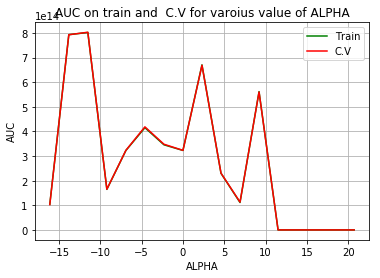

In [53]:
r=[]
import math
for p in (hyper):
    q=math.log(p)
    r.append(q)
print(r)
import matplotlib.pyplot as plt

#code for plotting graph
print(hyper)

print('--------------------------------------------------------------------------------------------')
print(auc1)

print('--------------------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------------------')
print(auc2)

plt.title('AUC on train and  C.V for varoius value of ALPHA')
plt.plot(r, auc1,'g',label ='Train')
plt.plot(r, auc2,'r',label ='C.V')

plt.ylabel('AUC')
plt.xlabel('ALPHA')
plt.grid()
plt.legend()
plt.show()

In [56]:
from sklearn.linear_model import LinearRegression
svm = linear_model.SGDRegressor(penalty='l1',alpha=100000)

# fitting the model
svm.fit(Xbow_tr_std, y_tr)

# predict the response
pred = svm.predict(Xbow_test_std)

# evaluate accuracy
acc =np.sqrt(mean_squared_error(y_test, pred))
print('\nThe accuracy of the linear SGDRegressor with L2 regulariser for alpha = %f is %f%%' % (100000, acc))


The accuracy of the linear SGDRegressor with L2 regulariser for alpha = 100000.000000 is 1.088330%


In [61]:
from sklearn.linear_model import LinearRegression
svm = linear_model.SGDRegressor(penalty='l1',alpha=100000)

# fitting the model
svm.fit(Xbow_tr_std2, yees)

# predict the response
pred3 = svm.predict(Xbow_test_std2)



In [62]:
df_te_after_drop['SGDR']=pred3

In [64]:
from sklearn.linear_model import LinearRegression
svm = linear_model.SGDRegressor(penalty='l1',alpha=100000)

# fitting the model
svm.fit(Xbow_tr_std2, yees)

# predict the response
pred4 = svm.predict(Xbow_tr_std2)



In [66]:
df_tr_after_drop['SGDR']=pred4

In [68]:
hyper =  [1, 5, 10, 50, 100, 500, 1000]

auc1=[]
auc2=[]

for j in hyper:
  
    model = DecisionTreeRegressor(max_depth=j)
    model.fit(Xbow_tr_std, y_tr)
    
    probs = model.predict(Xbow_tr_std)
    preds = probs
    roc_auc1=np.sqrt(mean_squared_error(y_tr, preds))
    auc1.append(roc_auc1)
    
  
    probs = model.predict(Xbow_cv_std)
    preds = probs
    roc_auc2=(mean_squared_error(y_cv, preds))
    auc2.append(roc_auc2)

In [69]:
r=[]
import math
for p in (hyper):
    q=math.log(p)
    r.append(q)
print(r)

[0.0, 1.6094379124341003, 2.302585092994046, 3.912023005428146, 4.605170185988092, 6.214608098422191, 6.907755278982137]


[1, 5, 10, 50, 100, 500, 1000]
--------------------------------------------------------------------------------------------
[1.0804388563215244, 1.0508647884431743, 1.0042894682489172, 1.1017773996154481e-05, 1.1017773996154481e-05, 1.1017773996154481e-05, 1.1017773996154481e-05]
--------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
[1.1632399503292383, 1.1001464687691187, 1.088806243978738, 2.2106039215178943, 2.2198423701357264, 2.215322760067489, 2.211408977459928]


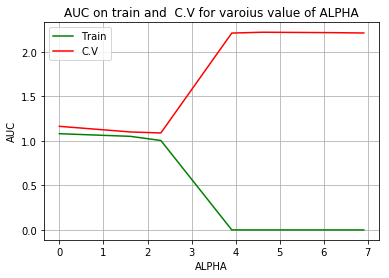

In [70]:
import matplotlib.pyplot as plt

#code for plotting graph
print(hyper)

print('--------------------------------------------------------------------------------------------')
print(auc1)

print('--------------------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------------------')
print(auc2)

plt.title('AUC on train and  C.V for varoius value of ALPHA')
plt.plot(r, auc1,'g',label ='Train')
plt.plot(r, auc2,'r',label ='C.V')

plt.ylabel('AUC')
plt.xlabel('ALPHA')
plt.grid()
plt.legend()
plt.show()

In [71]:
dtc = DecisionTreeRegressor(max_depth=10)

# fitting the model
dtc.fit(Xbow_tr_std, y_tr)

# predict the response
pred = dtc.predict(Xbow_test_std)

# evaluate accuracy
acc = np.sqrt(mean_squared_error(y_test, pred))
print('\nThe accuracy of the Decision tree classifier for depth = %f is %f%%' % (10, acc))


The accuracy of the Decision tree classifier for depth = 10.000000 is 1.043418%


In [73]:
dtc = DecisionTreeRegressor(max_depth=10)

# fitting the model
dtc.fit(Xbow_tr_std2, yees)

# predict the response
pred5 = dtc.predict(Xbow_test_std2)



In [74]:
df_te_after_drop['DT']=pred5

In [75]:
dtc = DecisionTreeRegressor(max_depth=10)

# fitting the model
dtc.fit(Xbow_tr_std2, yees)

# predict the response
pred6 = dtc.predict(Xbow_tr_std2)


In [77]:
df_tr_after_drop['DT']=pred6

In [ ]:
x_cfl=XGBRegressor()
prams={
 
 'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
 'n_estimators':[100,200,500,1000,2000],
 'max_depth':[3,5,10],
 
}
first_xgb=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,scoring='mean_squared_error')
first_xgb.fit(X_1,y_1)

In [ ]:

rf = XGBRegressor(n_estimators=2000,max_depth=10,learning_rate=.1,n_jobs=-1,scoring='mean_squared_error')

# fitting the model
rf.fit(Xbow_tr_std, y_tr)

# predict the response
pred7 = rf.predict(Xbow_test_std)

# evaluate accuracy
acc = np.sqrt(mean_squared_error(y_test, pred))

In [78]:

rf = XGBRegressor(n_estimators=2000,max_depth=10,learning_rate=.1,n_jobs=-1,scoring='mean_squared_error')

rf.fit(Xbow_tr_std2, yees)

# predict the response
pred7 = rf.predict(Xbow_test_std2)


In [79]:
df_te_after_drop['XGB']=pred7

In [80]:

rf = XGBRegressor(n_estimators=2000,max_depth=10,learning_rate=.1,n_jobs=-1,scoring='mean_squared_error')

rf.fit(Xbow_tr_std2, yees)

# predict the response
pred8 = rf.predict(Xbow_tr_std2)

In [82]:
df_tr_after_drop['XGB']=pred8

In [85]:
df_tr_after_drop.head()

,Unnamed: 0,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,...,resort_id,check_m_book,check_in_out,month,day,year,LR,SGDR,DT,XGB
0,0,3,1,2,0,46,3,3,3,1,...,7,0,31,5,4,2018,7.765207,7.709288,7.933577,7.731214
1,1,1,1,2,0,46,3,3,4,5,...,1,285,-202,11,4,2015,7.292851,7.709288,7.137434,6.629426
2,2,1,1,2,0,47,1,5,4,4,...,9,-26,120,1,2,2015,7.547152,7.709288,7.519855,7.826892
3,3,1,1,2,2,46,2,2,3,5,...,25,274,-143,11,6,2015,7.383077,7.709288,7.491760,5.431089
4,4,1,1,2,0,46,2,2,4,5,...,25,308,5,12,14,2015,7.289364,7.709288,7.196930,7.016216


In [89]:
if not os.path.isfile('final_features_mahindra_train_model.csv'):
    df_tr_after_drop.to_csv('final_features_mahindra_train_model.csv')

In [90]:
if not os.path.isfile('final_features_mahindra_test_model.csv'):
    df_te_after_drop.to_csv('final_features_mahindra_test_model.csv')

In [106]:
df_tr1=pd.read_csv('final_features_mahindra_train_model.csv')

In [107]:
df_tr1.head()

,Unnamed: 0,Unnamed: 0.1,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,...,resort_id,check_m_book,check_in_out,month,day,year,LR,SGDR,DT,XGB
0,0,0,3,1,2,0,46,3,3,3,...,7,0,31,5,4,2018,7.765207,7.709288,7.933577,7.731214
1,1,1,1,1,2,0,46,3,3,4,...,1,285,-202,11,4,2015,7.292851,7.709288,7.137434,6.629426
2,2,2,1,1,2,0,47,1,5,4,...,9,-26,120,1,2,2015,7.547152,7.709288,7.519855,7.826892
3,3,3,1,1,2,2,46,2,2,3,...,25,274,-143,11,6,2015,7.383077,7.709288,7.491760,5.431089
4,4,4,1,1,2,0,46,2,2,4,...,25,308,5,12,14,2015,7.289364,7.709288,7.196930,7.016216


In [108]:
df_te2=pd.read_csv('final_features_mahindra_test_model.csv')

In [131]:
df_te2.head()

,Unnamed: 0,Unnamed: 0.1,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,...,resort_id,check_m_book,check_in_out,month,day,year,LR,SGDR,DT,XGB
0,0,0,3,2,2,0,45,3,3,4,...,20,0,31,5,4,2018,7.696963,7.734035,7.789102,7.952867
1,1,1,1,2,4,0,45,1,1,4,...,28,30,4,6,23,2015,7.465981,7.734035,7.583531,7.831784
2,2,2,3,2,3,0,45,2,2,2,...,25,-13,92,7,8,2015,7.442282,7.734035,7.972906,7.149938
3,3,3,1,2,3,0,45,1,1,2,...,5,83,3,10,22,2015,7.672226,7.734035,7.972906,7.964001
4,4,4,1,2,4,0,45,1,2,3,...,27,3,121,1,10,2016,7.533989,7.734035,7.583531,7.865568


In [110]:
df_te_after_drop=df_te2.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [111]:
df_te_after_drop.shape

(146765, 28)

In [113]:
df_tr_after_drop=df_tr1.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [114]:
df_tr_after_drop.shape

(341424, 28)

In [115]:
df_te_after_drop.fillna(df_te_after_drop.mean(), inplace=True)
df_tr_after_drop.fillna(df_tr_after_drop.mean(), inplace=True)

In [116]:
Xbow_tr_std2 = sc.fit_transform(df_tr_after_drop)
Xbow_test_std2 = sc.transform(df_te_after_drop)

In [117]:
rf = XGBRegressor(n_estimators=2000,max_depth=10,learning_rate=.1,n_jobs=-1,scoring='mean_squared_error')

rf.fit(Xbow_tr_std2, yees)

# predict the response
pred9 = rf.predict(Xbow_test_std2)


In [118]:
submission = pd.read_csv('sample_submission.csv')
submission['amount_spent_per_room_night_scaled'] = pred9
submission.to_csv('sam_submission4.csv', index=False)
submission.head(10)

,reservation_id,amount_spent_per_room_night_scaled
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,7.789962
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,8.079452
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,6.657106
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,8.049114
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,8.184737
5,69a8c691057e9396eaa23625a47435eebda41102b83dfb...,6.975574
6,0cee97bb4f3b15493d20994fc4ef34b54d778f8eb7e6d3...,6.847355
7,13fd266f2859828250494a72c5e14d12dfdb6cac0983d8...,9.239137
8,8a0e44a731edd24628fa9e9d5d2ed9b22f07e91b6881f2...,8.635777
9,c3bdb69eedad1a992df7be568e50da86a4e1de8ad7ff36...,8.666919


In [119]:
#spilliting data 
from sklearn.model_selection import train_test_split

# split the data set into train and test
X_1, X_test, y_1, y_test = train_test_split(df_tr_after_drop, yees, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3)

In [120]:
X_test.fillna(X_test.mean(), inplace=True)
X_tr.fillna(X_tr.mean(), inplace=True)
X_cv.fillna(X_cv.mean(), inplace=True)
X_1.fillna(X_1.mean(), inplace=True)

In [121]:
sc = StandardScaler(with_mean=False)
Xbow_tr_std = sc.fit_transform(X_tr)
Xbow_test_std = sc.transform(X_test)
Xbow_cv_std = sc.fit_transform(X_cv)
X_1 = sc.fit_transform(X_1)


In [122]:
x_cfl=XGBRegressor()
prams={
 
 'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
 'n_estimators':[100,200,500,1000,2000],
 'max_depth':[3,5,10],
 
}
first_xgb=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,scoring='mean_squared_error')
first_xgb.fit(X_1,y_1)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed: 49.3min remaining: 28.6min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 51.3min remaining: 15.6min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 56.2min remaining:  6.2min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 73.1min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='mean_squared_error',
          verbose=10)

In [125]:
print (first_xgb.best_params_)

{'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.15}


In [128]:
rf = XGBRegressor(n_estimators=500,max_depth=5,learning_rate=.15,n_jobs=-1,scoring='mean_squared_error')

rf.fit(Xbow_tr_std2, yees)

# predict the response
pred9 = rf.predict(Xbow_test_std2)

In [129]:
pred10=pred9

In [130]:
submission = pd.read_csv('sample_submission.csv')
submission['amount_spent_per_room_night_scaled'] = pred10
submission.to_csv('sam_submission5.csv', index=False)
submission.head(10)

,reservation_id,amount_spent_per_room_night_scaled
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,7.788756
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,8.113274
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,6.834902
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,8.086095
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,7.983720
5,69a8c691057e9396eaa23625a47435eebda41102b83dfb...,7.108028
6,0cee97bb4f3b15493d20994fc4ef34b54d778f8eb7e6d3...,7.021180
7,13fd266f2859828250494a72c5e14d12dfdb6cac0983d8...,9.140976
8,8a0e44a731edd24628fa9e9d5d2ed9b22f07e91b6881f2...,8.449129
9,c3bdb69eedad1a992df7be568e50da86a4e1de8ad7ff36...,8.683438


In [132]:
df_te_after_drop=df_te2.drop(['Unnamed: 0','Unnamed: 0.1','day','year','LR','SGDR','DT','XGB'],axis=1)
df_tr_after_drop=df_tr1.drop(['Unnamed: 0','Unnamed: 0.1','day','year','LR','SGDR','DT','XGB'],axis=1)

In [135]:
#spilliting data 
from sklearn.model_selection import train_test_split

# split the data set into train and test
X_1, X_test, y_1, y_test = train_test_split(df_tr_after_drop, yees, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3)

In [136]:
X_test.fillna(X_test.mean(), inplace=True)
X_tr.fillna(X_tr.mean(), inplace=True)
X_cv.fillna(X_cv.mean(), inplace=True)
X_1.fillna(X_1.mean(), inplace=True)

In [137]:
sc = StandardScaler(with_mean=False)
Xbow_tr_std = sc.fit_transform(X_tr)
Xbow_test_std = sc.transform(X_test)
Xbow_cv_std = sc.fit_transform(X_cv)
X_1 = sc.fit_transform(X_1)


In [138]:
x_cfl=XGBRegressor()
prams={
 
 'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
 'n_estimators':[100,200,500,1000,2000],
 'max_depth':[3,5,10],
 
}
first_xgb=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,scoring='mean_squared_error')
first_xgb.fit(X_1,y_1)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed: 33.9min remaining: 19.6min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 41.8min remaining: 12.7min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 44.5min remaining:  4.9min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 56.2min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='mean_squared_error',
          verbose=10)

In [139]:
print (first_xgb.best_params_)

{'n_estimators': 2000, 'max_depth': 3, 'learning_rate': 0.1}


In [140]:

rf = XGBRegressor(n_estimators=2000,max_depth=3,learning_rate=.1,n_jobs=-1,scoring='mean_squared_error')

# fitting the model
rf.fit(Xbow_tr_std, y_tr)

# predict the response
pred7 = rf.predict(Xbow_test_std)

# evaluate accuracy
acc = np.sqrt(mean_squared_error(y_test, pred))
print(acc)

1.043417984084175


In [141]:
df_te_after_drop.fillna(df_te_after_drop.mean(), inplace=True)
df_tr_after_drop.fillna(df_tr_after_drop.mean(), inplace=True)

In [142]:
Xbow_tr_std2 = sc.fit_transform(df_tr_after_drop)
Xbow_test_std2 = sc.transform(df_te_after_drop)

In [144]:
rf = XGBRegressor(n_estimators=2000,max_depth=3,learning_rate=.1,n_jobs=-1,scoring='mean_squared_error')

rf.fit(Xbow_tr_std2, yees)

# predict the response
pred11 = rf.predict(Xbow_test_std2)


In [145]:
submission = pd.read_csv('sample_submission.csv')
submission['amount_spent_per_room_night_scaled'] = pred11
submission.to_csv('sam_submission6.csv', index=False)
submission.head(10)

,reservation_id,amount_spent_per_room_night_scaled
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,8.035757
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,7.358479
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,7.587692
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,7.805092
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,7.506137
5,69a8c691057e9396eaa23625a47435eebda41102b83dfb...,7.655191
6,0cee97bb4f3b15493d20994fc4ef34b54d778f8eb7e6d3...,7.141890
7,13fd266f2859828250494a72c5e14d12dfdb6cac0983d8...,8.480830
8,8a0e44a731edd24628fa9e9d5d2ed9b22f07e91b6881f2...,7.864751
9,c3bdb69eedad1a992df7be568e50da86a4e1de8ad7ff36...,7.798217


In [146]:
rf = XGBRegressor(n_estimators=2000,max_depth=3,learning_rate=.1,n_jobs=-1,scoring='rmse')

rf.fit(Xbow_tr_std2, yees)

# predict the response
pred11 = rf.predict(Xbow_test_std2)


In [147]:
submission = pd.read_csv('sample_submission.csv')
submission['amount_spent_per_room_night_scaled'] = pred11
submission.to_csv('sam_submission7.csv', index=False)
submission.head(10)

,reservation_id,amount_spent_per_room_night_scaled
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,8.035757
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,7.358479
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,7.587692
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,7.805092
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,7.506137
5,69a8c691057e9396eaa23625a47435eebda41102b83dfb...,7.655191
6,0cee97bb4f3b15493d20994fc4ef34b54d778f8eb7e6d3...,7.141890
7,13fd266f2859828250494a72c5e14d12dfdb6cac0983d8...,8.480830
8,8a0e44a731edd24628fa9e9d5d2ed9b22f07e91b6881f2...,7.864751
9,c3bdb69eedad1a992df7be568e50da86a4e1de8ad7ff36...,7.798217


In [151]:
df_tr1.head()

,Unnamed: 0,Unnamed: 0.1,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,...,resort_id,check_m_book,check_in_out,month,day,year,LR,SGDR,DT,XGB
0,0,0,3,1,2,0,46,3,3,3,...,7,0,31,5,4,2018,7.765207,7.709288,7.933577,7.731214
1,1,1,1,1,2,0,46,3,3,4,...,1,285,-202,11,4,2015,7.292851,7.709288,7.137434,6.629426
2,2,2,1,1,2,0,47,1,5,4,...,9,-26,120,1,2,2015,7.547152,7.709288,7.519855,7.826892
3,3,3,1,1,2,2,46,2,2,3,...,25,274,-143,11,6,2015,7.383077,7.709288,7.491760,5.431089
4,4,4,1,1,2,0,46,2,2,4,...,25,308,5,12,14,2015,7.289364,7.709288,7.196930,7.016216


In [153]:
df_te_after_drop=df_te2.drop(['Unnamed: 0','Unnamed: 0.1','day','year','LR','SGDR','DT','XGB','memberid','month'],axis=1)
df_tr_after_drop=df_tr1.drop(['Unnamed: 0','Unnamed: 0.1','day','year','LR','SGDR','DT','XGB','memberid','month'],axis=1)

In [154]:
#spilliting data 
from sklearn.model_selection import train_test_split

# split the data set into train and test
X_1, X_test, y_1, y_test = train_test_split(df_tr_after_drop, yees, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3)

In [155]:
X_test.fillna(X_test.mean(), inplace=True)
X_tr.fillna(X_tr.mean(), inplace=True)
X_cv.fillna(X_cv.mean(), inplace=True)
X_1.fillna(X_1.mean(), inplace=True)

In [156]:
sc = StandardScaler(with_mean=False)
Xbow_tr_std = sc.fit_transform(X_tr)
Xbow_test_std = sc.transform(X_test)
Xbow_cv_std = sc.fit_transform(X_cv)
X_1 = sc.fit_transform(X_1)


In [157]:
x_cfl=XGBRegressor()
prams={
 
 'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
 'n_estimators':[100,200,500,1000,2000],
 'max_depth':[3,5,10],
 
}
first_xgb=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,scoring='mean_squared_error')
first_xgb.fit(X_1,y_1)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed: 22.8min remaining: 13.2min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 24.1min remaining:  7.3min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 27.7min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 32.0min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='mean_squared_error',
          verbose=10)

In [158]:
print (first_xgb.best_params_)

{'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.03}


In [159]:

rf = XGBRegressor(n_estimators=1000,max_depth=5,learning_rate=.03,n_jobs=-1,scoring='mean_squared_error')

# fitting the model
rf.fit(Xbow_tr_std, y_tr)

# predict the response
pred7 = rf.predict(Xbow_test_std)

# evaluate accuracy
acc = np.sqrt(mean_squared_error(y_test, pred))
print(acc)

1.043417984084175


In [164]:

rf = XGBRegressor(n_estimators=1500,max_depth=10,learning_rate=.03,n_jobs=-1,scoring='mean_squared_error')

# fitting the model
rf.fit(Xbow_tr_std, y_tr)

# predict the response
pred7 = rf.predict(Xbow_test_std)

# evaluate accuracy
acc = np.sqrt(mean_squared_error(y_test, pred))
print(acc)

1.043417984084175


In [160]:
df_te_after_drop.fillna(df_te_after_drop.mean(), inplace=True)
df_tr_after_drop.fillna(df_tr_after_drop.mean(), inplace=True)

In [161]:
Xbow_tr_std2 = sc.fit_transform(df_tr_after_drop)
Xbow_test_std2 = sc.transform(df_te_after_drop)

In [162]:
rf = XGBRegressor(n_estimators=1000,max_depth=5,learning_rate=.03,n_jobs=-1,scoring='mean_squared_error')

rf.fit(Xbow_tr_std2, yees)

# predict the response
pred12 = rf.predict(Xbow_test_std2)


In [163]:
submission = pd.read_csv('sample_submission.csv')
submission['amount_spent_per_room_night_scaled'] = pred11
submission.to_csv('sam_submission7.csv', index=False)
submission.head(10)

,reservation_id,amount_spent_per_room_night_scaled
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,8.035757
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,7.358479
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,7.587692
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,7.805092
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,7.506137
5,69a8c691057e9396eaa23625a47435eebda41102b83dfb...,7.655191
6,0cee97bb4f3b15493d20994fc4ef34b54d778f8eb7e6d3...,7.141890
7,13fd266f2859828250494a72c5e14d12dfdb6cac0983d8...,8.480830
8,8a0e44a731edd24628fa9e9d5d2ed9b22f07e91b6881f2...,7.864751
9,c3bdb69eedad1a992df7be568e50da86a4e1de8ad7ff36...,7.798217


In [165]:
df_te_after_drop=df_te2.drop(['Unnamed: 0','Unnamed: 0.1','day','year','LR','SGDR','DT','XGB','memberid','month','reservationstatusid_code','check_m_book','check_in_out'],axis=1)
df_tr_after_drop=df_tr1.drop(['Unnamed: 0','Unnamed: 0.1','day','year','LR','SGDR','DT','XGB','memberid','month','reservationstatusid_code','check_m_book','check_in_out'],axis=1)

In [166]:
#spilliting data 
from sklearn.model_selection import train_test_split

# split the data set into train and test
X_1, X_test, y_1, y_test = train_test_split(df_tr_after_drop, yees, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3)

In [167]:
X_test.fillna(X_test.mean(), inplace=True)
X_tr.fillna(X_tr.mean(), inplace=True)
X_cv.fillna(X_cv.mean(), inplace=True)
X_1.fillna(X_1.mean(), inplace=True)

In [168]:
sc = StandardScaler(with_mean=False)
Xbow_tr_std = sc.fit_transform(X_tr)
Xbow_test_std = sc.transform(X_test)
Xbow_cv_std = sc.fit_transform(X_cv)
X_1 = sc.fit_transform(X_1)


In [169]:
x_cfl=XGBRegressor()
prams={
 
 'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
 'n_estimators':[100,200,500,1000,2000],
 'max_depth':[3,5,10],
 
}
first_xgb=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,scoring='mean_squared_error')
first_xgb.fit(X_1,y_1)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed: 36.9min remaining: 21.4min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 41.2min remaining: 12.5min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 46.7min remaining:  5.2min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 50.2min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='mean_squared_error',
          verbose=10)

In [170]:
print (first_xgb.best_params_)

{'n_estimators': 2000, 'max_depth': 3, 'learning_rate': 0.05}


In [171]:

rf = XGBRegressor(n_estimators=2000,max_depth=3,learning_rate=.05,n_jobs=-1,scoring='mean_squared_error')

# fitting the model
rf.fit(Xbow_tr_std, y_tr)

# predict the response
pred7 = rf.predict(Xbow_test_std)

# evaluate accuracy
acc = np.sqrt(mean_squared_error(y_test, pred))
print(acc)

1.043417984084175


In [ ]:
df_te_after_drop.fillna(df_te_after_drop.mean(), inplace=True)
df_tr_after_drop.fillna(df_tr_after_drop.mean(), inplace=True)

In [ ]:
Xbow_tr_std2 = sc.fit_transform(df_tr_after_drop)
Xbow_test_std2 = sc.transform(df_te_after_drop)

In [ ]:
rf = XGBRegressor(n_estimators=2000,max_depth=3,learning_rate=.1,n_jobs=-1,scoring='mean_squared_error')

rf.fit(Xbow_tr_std2, yees)

# predict the response
pred12 = rf.predict(Xbow_test_std2)


In [ ]:
submission = pd.read_csv('sample_submission.csv')
submission['amount_spent_per_room_night_scaled'] = pred11
submission.to_csv('sam_submission7.csv', index=False)
submission.head(10)